## Titanic Data Set Kaggle
Given dataset with titanic disaster we are going to create a model that will predict whether given unknown person would survive the catastrophy or die.

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import numpy as np
from functions.LoadingData import LoadData
%matplotlib inline

### Load the data

Shape of DataFrame is (891, 12)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


None


Head of DataFrame:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Number of NaN values in DataFrame:


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Number of duplicates in DataFrame:


0


Visualisation of missing values in data set:


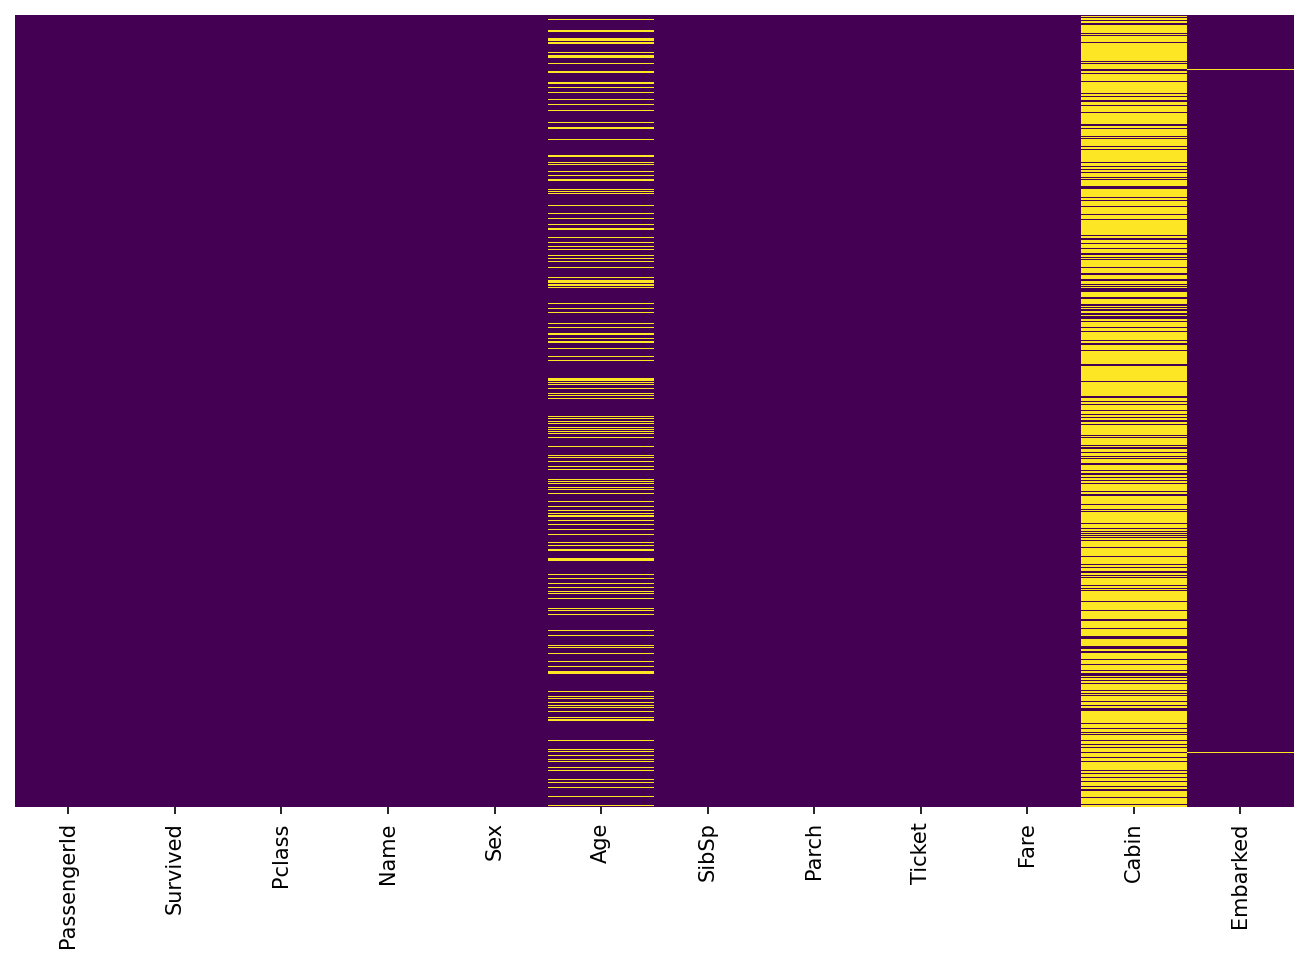

In [75]:
d = LoadData('data/train_titanic.csv')
titanic = d.create_data()

As we can see cabin column have many missing values, we are going to delete this column.

In [76]:
titanic.drop('Cabin', axis=1, inplace=True)

In [77]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [78]:
titanic['Name'].nunique()

891

We are going to delete also Name column, its not going to improve our machine learning model because every single value is unique, also passenger id is original fo every single passenger so it brings no value to model.

In [79]:
titanic.drop(['Name', 'PassengerId'], axis=1, inplace=True)

Now lets look at Age column there are some missing values but we can sort it out with missing data techniques.

In [80]:
titanic['Age'].isnull().sum()

177

In [81]:
titanic['Age'].mean()

29.69911764705882

In [82]:
titanic.rename(columns={'SibSp':'NumberOfSiblings'},inplace=True)

In [83]:
titanic.fillna(value={'Age': int(titanic['Age'].mean())}, inplace=True)
titanic.drop('Ticket',axis=1,inplace=True)

In [84]:
titanic.head()

,Survived,Pclass,Sex,Age,NumberOfSiblings,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [85]:
pclass_dummies = pd.get_dummies(titanic['Pclass'])
pclass_dummies.rename({1:'Pclass1', 2:'Pclass2', 3: 'Pclass3'},inplace=True, axis=1)
pclass_dummies.head()

,Pclass1,Pclass2,Pclass3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


In [86]:
dummies_sex = pd.get_dummies(titanic['Sex'])
dummies_sex.head()

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


<AxesSubplot:xlabel='Pclass', ylabel='count'>

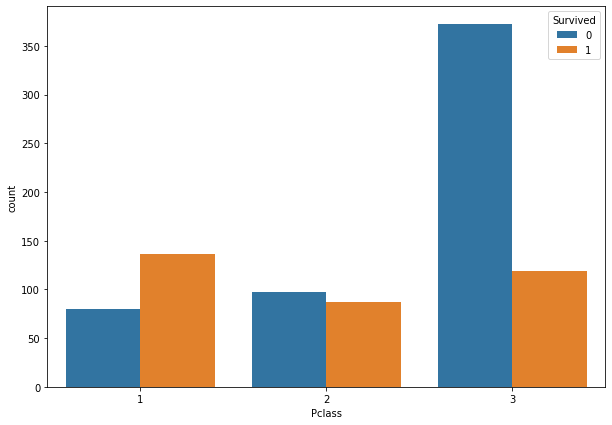

In [87]:
plt.figure(figsize=(10,7))
sns.countplot(data=titanic, x='Pclass',hue='Survived')

<AxesSubplot:xlabel='Survived', ylabel='count'>

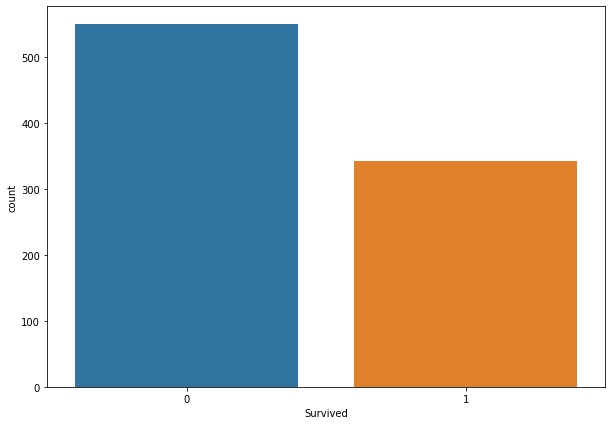

In [88]:
plt.figure(figsize=(10,7))
sns.countplot(data=titanic, x='Survived')

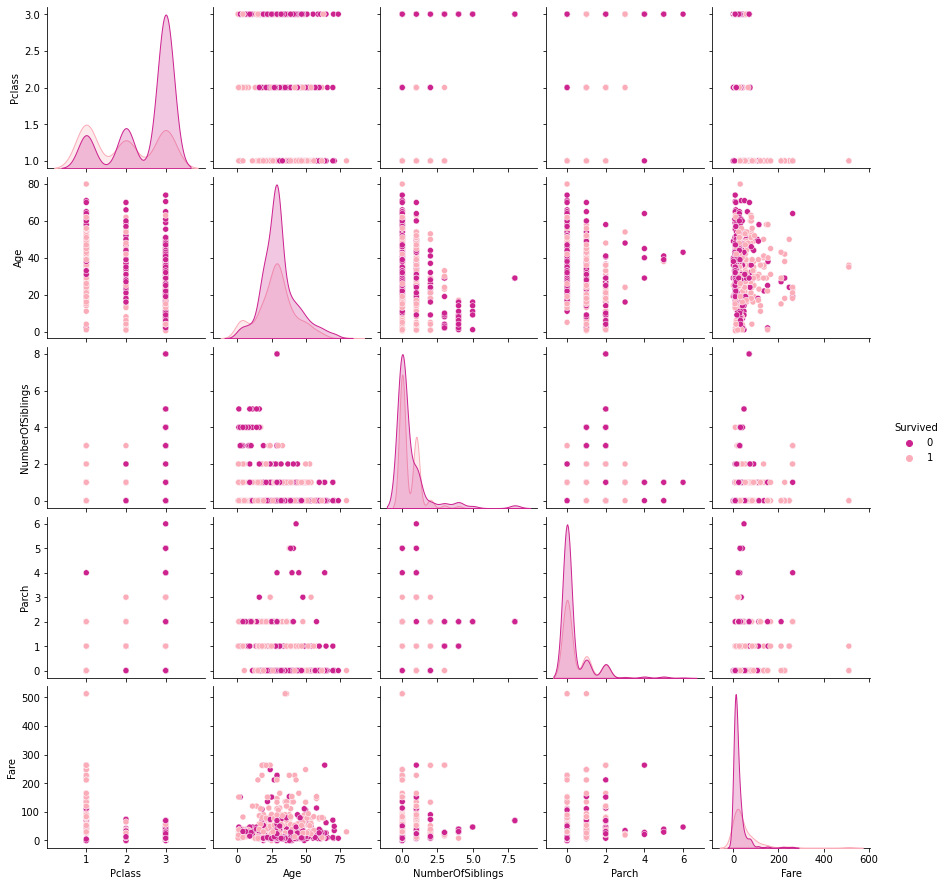

In [89]:
sns.pairplot(data=titanic, hue='Survived', palette='RdPu_r')

<AxesSubplot:xlabel='NumberOfSiblings', ylabel='count'>

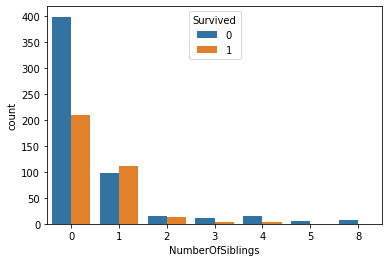

In [90]:
sns.countplot(data=titanic, x='NumberOfSiblings',hue='Survived')

In [91]:
embarked_dummies = pd.get_dummies(titanic['Embarked'])
embarked_dummies.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [92]:
titanic.drop(columns=['Embarked', 'Pclass', 'Sex'],inplace=True)

In [93]:
titanic = titanic.join([pclass_dummies, embarked_dummies, dummies_sex])

In [94]:
titanic.head()

,Survived,Age,NumberOfSiblings,Parch,Fare,Pclass1,Pclass2,Pclass3,C,Q,S,female,male
0,0,22.0,1,0,7.2500,0,0,1,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,0,0,1,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,0,1,0,1


In [95]:
parch_dummies = pd.get_dummies(titanic['Parch'])
parch_dummies.rename({i:'Parch'+str(i) for i in range(titanic['Parch'].nunique())}, inplace=True, axis=1)
parch_dummies.head()

,Parch0,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [96]:
titanic.drop(columns='Parch',inplace=True)
titanic = titanic.join(parch_dummies)

### Creating Logistic Regression model

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,\
    mean_squared_error
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

In [98]:
titanic.dropna(axis=0,inplace=True)
titanic.isna().sum()

Survived            0
Age                 0
NumberOfSiblings    0
Fare                0
Pclass1             0
Pclass2             0
Pclass3             0
C                   0
Q                   0
S                   0
female              0
male                0
Parch0              0
Parch1              0
Parch2              0
Parch3              0
Parch4              0
Parch5              0
Parch6              0
dtype: int64

Spliting data and creating a model

In [99]:
X_train, X_test, y_train, y_test = train_test_split(titanic.drop(['Survived'],
                                    axis=1).values,
                                    titanic['Survived'].values,
                                    test_size=0.2,
                                    random_state=42)

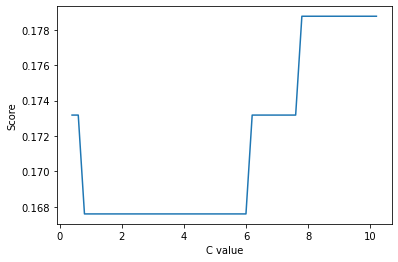

In [100]:
def find_best_model(estimator, degree: int, iterations: int):
    error = []
    c_vals = []
    c = 0.2
    for i in range(iterations):
        c += 0.2
        c_vals.append(c)
        model = make_pipeline(PolynomialFeatures(degree=degree),
                            StandardScaler(),
                            estimator(C=c,max_iter=10**5)).fit(X_train, y_train)
        error.append(mean_squared_error(y_test, model.predict(X_test)))
    plt.plot(c_vals,error)
    plt.xlabel('C value')
    plt.ylabel('Score')
    return c_vals[error.index(min(error))]

C_logistic = find_best_model(LogisticRegression, 2, 50)

In [101]:
logistic_model = make_pipeline(PolynomialFeatures(degree=2),
                                 StandardScaler(),
                                 LogisticRegression(C=C_logistic,
                                 max_iter=10**5))
logistic_model.fit(X_train,y_train)
print(f'Logistic Regression score is {cross_val_score(logistic_model,X_train,y_train).mean()}')
print(f'Roc auc score is {roc_auc_score(y_test, logistic_model.predict(X_test))}')

Logistic Regression score is 0.8216290751502019
Roc auc score is 0.8152509652509652


In [102]:
prediction = logistic_model.predict(X_test)
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       105
           1       0.85      0.72      0.78        74

    accuracy                           0.83       179
   macro avg       0.84      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



In [103]:
confusion_matrix(y_test, prediction)

array([[96,  9],
       [21, 53]], dtype=int64)

#### Prepare test set

In [104]:
test_set = pd.read_csv('data/test.csv')
real_values = pd.read_csv('data/gender_submission.csv')
real_values.drop(columns='PassengerId', axis=1, inplace=True)
test_set.drop(['PassengerId','Name','Ticket','Cabin'],axis=1,inplace=True)
test_set.head()
testPclass = pd.get_dummies(test_set['Pclass'])
testPclass.rename({1:'Pclass1', 2:'Pclass2', 3: 'Pclass3'},inplace=True, axis=1)
parch_test = pd.get_dummies(test_set['Parch'])
parch_test.rename({i:'Parch'+str(i) for i in range(test_set['Parch'].nunique())}, inplace=True, axis=1)
testset_sex = pd.get_dummies(test_set['Sex'])
embarked_test = pd.get_dummies(test_set['Embarked'])
parch_test = pd.get_dummies(test_set['Parch'])
parch_test.rename({i:'Parch'+str(i) for i in range(test_set['Parch'].nunique())}, inplace=True, axis=1)
test_set.drop(['Embarked','Pclass', 'Sex','Parch'],axis=1,inplace=True)
test_set = test_set.join([testPclass, embarked_test, testset_sex, parch_test])
test_set.drop(9,axis=1,inplace=True)
test_set.isna().sum()
test_set.fillna(value={'Age': int(titanic['Age'].mean())}, inplace=True)
test_set.dropna(axis=0,inplace=True)
test_set = test_set.join(real_values)
test_set.head()

,Age,SibSp,Fare,Pclass1,Pclass2,Pclass3,C,Q,S,female,male,Parch0,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6,Survived
0,34.5,0,7.8292,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0
1,47.0,1,7.0000,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1
2,62.0,0,9.6875,0,1,0,0,1,0,0,1,1,0,0,0,0,0,0,0
3,27.0,0,8.6625,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,0
4,22.0,1,12.2875,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1


In [105]:
titanic.head()

,Survived,Age,NumberOfSiblings,Fare,Pclass1,Pclass2,Pclass3,C,Q,S,female,male,Parch0,Parch1,Parch2,Parch3,Parch4,Parch5,Parch6
0,0,22.0,1,7.2500,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0
1,1,38.0,1,71.2833,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0
3,1,35.0,1,53.1000,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0
4,0,35.0,0,8.0500,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0


In [106]:
test_set_predicitons = logistic_model.predict(test_set.drop(columns='Survived',axis=1).values)
confusion_matrix(test_set['Survived'].values,test_set_predicitons)

array([[244,  21],
       [ 30, 122]], dtype=int64)

In [107]:
print(classification_report(test_set['Survived'].values,test_set_predicitons))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       265
           1       0.85      0.80      0.83       152

    accuracy                           0.88       417
   macro avg       0.87      0.86      0.87       417
weighted avg       0.88      0.88      0.88       417



We end up with model accurate in 88% where precision for 0 and 1 are respectively(89%, 85%) and recall (92%, 80%).

### Trying other classifiers

In [108]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

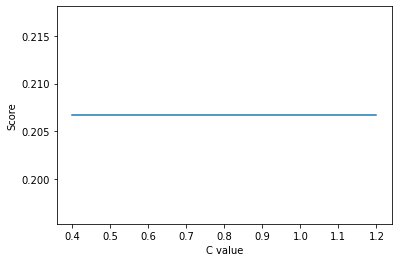

In [109]:
c_svc = find_best_model(LinearSVC, 1, 5)

In [110]:
linear_svc = make_pipeline(StandardScaler(),LinearSVC(C=c_svc))
linear_svc.fit(X_train,y_train)
print(f'Linear SVC score is {cross_val_score(linear_svc, X_train, y_train).mean()}')
print(f'Roc auc score is {roc_auc_score(y_test, linear_svc.predict(X_test))}')

Linear SVC score is 0.7907022554909879
Roc auc score is 0.7799227799227799


c:\Users\barto\anaconda3\envs\machinelearning\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [111]:
from sklearn.svm import SVC

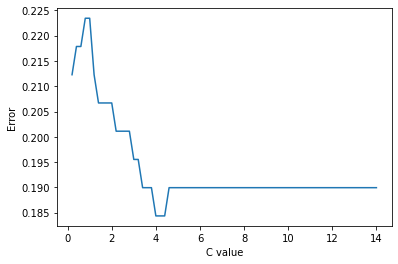

In [112]:
def find_best_model_SVC(degree: int, iterations: int):
    error = []
    c_vals = []
    c = 0
    for i in range(iterations):
        c += 0.2
        c_vals.append(c)
        model = make_pipeline(PolynomialFeatures(degree=degree),
                            StandardScaler(),
                            SVC(C=c,
                            max_iter=10**5,
                            degree=degree,
                            kernel='poly')).fit(X_train, y_train)
        error.append(mean_squared_error(y_test, model.predict(X_test)))
    plt.plot(c_vals,error)
    plt.xlabel('C value')
    plt.ylabel('Error')
    return c_vals[error.index(min(error))]
    
C_poly = find_best_model_SVC(2,70)

In [113]:
polynomial_svc = make_pipeline(PolynomialFeatures(2),
                                StandardScaler(),
                                SVC(C=c_svc,
                                degree=2,
                                kernel='poly'))
polynomial_svc.fit(X_train, y_train)
print(f'Polynomial SVC score is {cross_val_score(polynomial_svc,X_train,y_train).mean()}')
print(f'Roc auc score is {roc_auc_score(y_test, polynomial_svc.predict(X_test))}')

Polynomial SVC score is 0.799133261105092
Roc auc score is 0.7564350064350065


In [114]:
poly_predict = polynomial_svc.predict(test_set.drop('Survived', axis=1).values)
print(classification_report(test_set['Survived'], poly_predict))
confusion_matrix(test_set['Survived'], poly_predict)

              precision    recall  f1-score   support

           0       0.85      0.99      0.92       265
           1       0.98      0.70      0.82       152

    accuracy                           0.89       417
   macro avg       0.92      0.85      0.87       417
weighted avg       0.90      0.89      0.88       417



array([[263,   2],
       [ 45, 107]], dtype=int64)

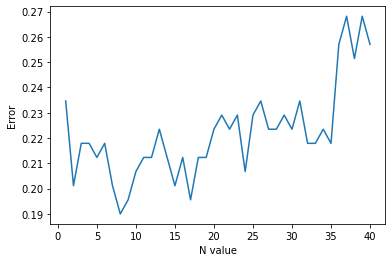

In [115]:
def find_best_KNN(degree: int, iterations: int):
    error = []
    c_vals = []
    c = 0
    for i in range(iterations):
        c += 1
        c_vals.append(c)
        model = make_pipeline(PolynomialFeatures(degree=degree),
                            StandardScaler(),
                            KNeighborsClassifier(n_neighbors=c)).fit(X_train, y_train)
        error.append(mean_squared_error(y_test, model.predict(X_test)))
    plt.plot(c_vals,error)
    plt.xlabel('N value')
    plt.ylabel('Error')
    return c_vals[error.index(min(error))]

n = find_best_KNN(1,40)

In [116]:
knn_model = make_pipeline(PolynomialFeatures(1),
                        StandardScaler(),
                        KNeighborsClassifier(n_neighbors=n)).fit(X_train, y_train)
knn_model.fit(X_train, y_train)
print(f'KNN score is {cross_val_score(knn_model,X_train,y_train).mean()}')
print(f'Roc auc score is {roc_auc_score(y_test, knn_model.predict(X_test))}')

KNN score is 0.7949965527430317
Roc auc score is 0.7902187902187902


In [117]:
k_predict = knn_model.predict(test_set.drop('Survived',axis=1).values)
print(classification_report(test_set['Survived'], k_predict))
confusion_matrix(test_set['Survived'].values, k_predict)

              precision    recall  f1-score   support

           0       0.86      0.97      0.91       265
           1       0.93      0.74      0.82       152

    accuracy                           0.88       417
   macro avg       0.90      0.85      0.87       417
weighted avg       0.89      0.88      0.88       417



array([[256,   9],
       [ 40, 112]], dtype=int64)

### Conclusion
We managed to get similar results on different learning algorithms around 88% accuracy with approximately 50 out of 417 missclassification, I think we can consider that as a good score